# Class 03
## Big Data Cleaning: Data Transformations

Although machine learning is the exciting part of this course, most data scientists spend the vast majority of their time doing data clearning and data wrangling. Some put the figure at as high as 90% of their time! There is a good reason for this: most of the data out there is not in a format needed for the machine learning algorithms. So, in order to do machine learning, the data must be reorganized, cleaned, rearranged, normalized, enriched, and filtered. We'll begin this process today and continue working on it through the course.

### Feature Types

We start with an overview of some of the types of features we could potentially use. In the end, all of the data are represented as bits in the computer (ones and zeros), but we can organize those bits in a bunch of different ways in the pandas dataframes. We'll build a "fake" dataframe with the different types in them.

#### Integers

Integers are counting numbers and other whole numbers (including negatives): ...,-4,-3,-2,-1,0,1,2,3,4,... They are somewhat special because they can be stored very efficiently and the computer can operate on them very efficiently (positive integers especially). Pandas stores these using a data type called **int64** where the 64 means they are 64-bit integers (capable of storing any number between -9,223,372,036,854,775,807 and 9,223,372,036,854,775,807)

We'll use a sample dataset to look at the different types of data as we go.

In [1]:
import pandas as pd

sampledata = pd.read_csv('Class03_sample_dataframe.csv')

# This will let us look at the data type of each column. Note that the first column is an "int64".
print(sampledata.dtypes)

# These are the values stored in this column.
print("\nInteger Values")
print(sampledata['IntCol'].values)

IntCol        int64
FloatCol    float64
TextCol      object
CatCol       object
DateCol      object
LatCol      float64
LonCol      float64
dtype: object

Integer Values
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


#### Floating point numbers

Floating point numbers, or decimal numbers are just that: any number with a decimal place in it such as 4.566642 and -156.986714. Pandas stores these as a **float64**. They could also be stored in scientific notation like this: 4.509013e+14. This means "4.509013 times 10 raised to the +14". These are still floating point numbers and are treated like any other decimal number.

In [2]:
print("Float Values")
print(sampledata['FloatCol'].values)

Float Values
[ 1.34846527  1.65852321  1.99091463  2.15807893  2.50018684  2.60270486
  2.79540154  3.01384446  3.1916722   3.25200862  3.46085057  3.6586824
  3.79061854  3.83351212  3.94635944  4.15475126  4.27976091  4.27608798
  4.44673513  4.59670764]


Before we move on, I'd like to take a quick look at the data graphically.

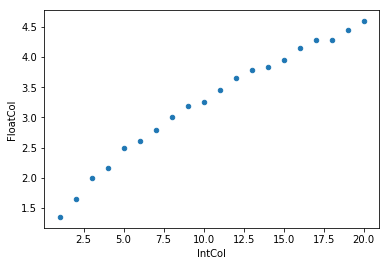

In [3]:
sampledata.plot(kind='scatter', x='IntCol',y='FloatCol')

Because this is "fake" data, I put in a functional dependence here. The float column looks like it is some function of the integer column. It is almost always a good idea to visualize your data early on to see what it looks like graphically!

#### Text

Pandas can store text in its columns. Because there are a number of different types of text objects, by default pandas will store text as an **object** which just means it doesn't know which of the types it really is. Text can, in principle, be anything you want it to be, so it is both the most flexible and the most challenging data type.

In [4]:
print("Text Values")
print(sampledata['TextCol'].values)

Text Values
['cat' 'dog' 'horse' 'cow' 'elephant' 'fish' 'bird' 'dinosaur' 'giraffe'
 'wolf' 'prairie dog' 'whale' 'dolphin' 'clam' 'lizard' 'snake' 'fly'
 'beetle' 'spider' 'worm']


#### Categorical

A categorical data type is a finite set of different objects. These objects are represented internally as integers but may be displayed as text or other generic objects. To make things simple, we'll start with a categorical object that has three possible values: "yes", "no", and "maybe". Internally, pandas will represent these as integers 0,1, and 2. But it knows that this is a categorical data type, so it keeps track of the text value associated with the integer and displays that for the user.

In [5]:
print("Categorical Values")
print(sampledata['CatCol'].values)

Categorical Values
['no' 'no' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'maybe' 'no' 'no' 'no' 'no'
 'no' 'yes' 'maybe' 'no' 'yes' 'yes' 'yes']


When we loaded the data, it actually loaded this column as an **object**, which means it doesn't know that it is supposed to be a categorical column. We will tell pandas to do that. We will use the `astype()` command that will tell pandas to change the data type of that column. We check to make sure it worked, too. Note that the "CatCol2" column is now a 'category' type.

_**Data Processing Tip**_

A quick aside here: there are a couple of ways of doing this kind of transformation on the data. We'll see this a little later when we do more column-wise processing. We could either change the original column or we could create a new column. The second method doesn't overwrite the original data and will be what we typically do. That way if something goes wrong or we want to change how we are processing the data, we still have the original data column to work with.

In [6]:
sampledata["CatCol2"] = sampledata["CatCol"].astype('category')
sampledata.dtypes

IntCol         int64
FloatCol     float64
TextCol       object
CatCol        object
DateCol       object
LatCol       float64
LonCol       float64
CatCol2     category
dtype: object

In [7]:
sampledata["FloatToInt"] = sampledata["FloatCol"].astype('int')
sampledata.dtypes

IntCol           int64
FloatCol       float64
TextCol         object
CatCol          object
DateCol         object
LatCol         float64
LonCol         float64
CatCol2       category
FloatToInt       int64
dtype: object

In [8]:
sampledata[['FloatCol','FloatToInt']].head()

,FloatCol,FloatToInt
0,1.348465,1
1,1.658523,1
2,1.990915,1
3,2.158079,2
4,2.500187,2


We can now look at how the data are stored as categorical data. We can get thi internal codes for each of the entries like this:

In [9]:
sampledata["CatCol2"].cat.codes

0     1
1     1
2     2
3     1
4     2
5     1
6     2
7     2
8     0
9     1
10    1
11    1
12    1
13    1
14    2
15    0
16    1
17    2
18    2
19    2
dtype: int8

We can also get a list of the categories that pandas found when converting the column. These are in order- the first entry corresponds to 0, the second to 1, etc.

In [10]:
sampledata["CatCol2"].cat.categories

Index(['maybe', 'no', 'yes'], dtype='object')

We may encounter situations where we want to plot the data and visualize each category as its own color. We saw how to do this back in Class01.

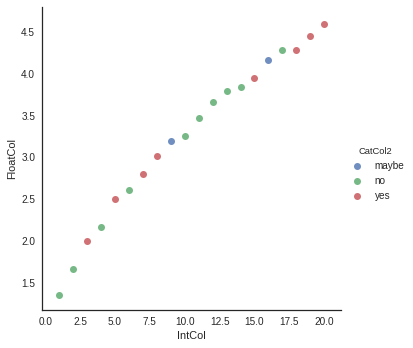

In [11]:
import seaborn as sns
sns.set_style('white')
sns.lmplot(x='IntCol', y='FloatCol', data=sampledata, hue='CatCol2', fit_reg=False)

#### Date/Times

We will frequently encounter date/time values in working with data. There are many different ways that these values get stored, but mostly we'll find that they start as a text object. We need to know how they are stored (in what order are the year-month-day-hour-minute-second values are stored). There are utilities to convert any type of date/time string to a datetime object in pandas. We will start with the ISO 8601 datetime standard, since it is both the most logical and the easiest to work with. Dates are stored like this: **2017-01-23** where we use a four-digit year, then a two-digit month and a two-digit day, all separated by dashes. If we want to add a time, it is appended to the date like this: **2017-01-23T03:13:42**. The "T" tells the computer that we've added a time. Then it is followed by a two-digit hour (using 00 as midnight and 23 as 11pm) a colon, a two-digit minute, a colon, and a two-digit second. There are other variations of this that can include a time-zone, but we will leave those for later. 

In [12]:
print("Date/Time Values")
print(sampledata['DateCol'].values)

Date/Time Values
['2017-01-25T11:10:15' '2017-01-26T00:06:43' '2017-01-26T21:11:33'
 '2017-01-27T06:44:09' '2017-01-27T20:55:49' '2017-01-28T03:26:11'
 '2017-01-28T17:50:22' '2017-01-29T04:02:27' '2017-01-29T15:19:37'
 '2017-01-29T18:03:21' '2017-01-30T00:06:48' '2017-01-30T14:10:13'
 '2017-01-31T10:56:47' '2017-01-31T12:03:30' '2017-01-31T18:25:47'
 '2017-02-01T16:11:57' '2017-02-02T10:41:38' '2017-02-02T23:53:35'
 '2017-02-03T22:16:36' '2017-02-04T06:41:42']


They are currently stored as **objects**, not as datetimes. We need to convert this column as well, but we'll use a special pandas function to do that. Take a quick look at the [reference page](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for this function to see what else it can do. Note that the new column has type **datetime64[ns]**. That means that the date format is capable of counting nanoseconds. We won't use all of that capability, but pandas used that format because our dates are accurate to the second.

In [13]:
sampledata["DateCol2"] = pd.to_datetime(sampledata["DateCol"])
sampledata.dtypes

IntCol                 int64
FloatCol             float64
TextCol               object
CatCol                object
DateCol               object
LatCol               float64
LonCol               float64
CatCol2             category
FloatToInt             int64
DateCol2      datetime64[ns]
dtype: object

In [14]:
#We print out the column to see what it looks like
sampledata["DateCol2"]

0    2017-01-25 11:10:15
1    2017-01-26 00:06:43
2    2017-01-26 21:11:33
3    2017-01-27 06:44:09
4    2017-01-27 20:55:49
5    2017-01-28 03:26:11
6    2017-01-28 17:50:22
7    2017-01-29 04:02:27
8    2017-01-29 15:19:37
9    2017-01-29 18:03:21
10   2017-01-30 00:06:48
11   2017-01-30 14:10:13
12   2017-01-31 10:56:47
13   2017-01-31 12:03:30
14   2017-01-31 18:25:47
15   2017-02-01 16:11:57
16   2017-02-02 10:41:38
17   2017-02-02 23:53:35
18   2017-02-03 22:16:36
19   2017-02-04 06:41:42
Name: DateCol2, dtype: datetime64[ns]

Now that we have the datetime column, I'd like to plot the data as a function of date. This is often a useful thing to do with time series data. We'll need to import the matplotlib library and use a trick to format the data by date. Here's the code that makes it work.

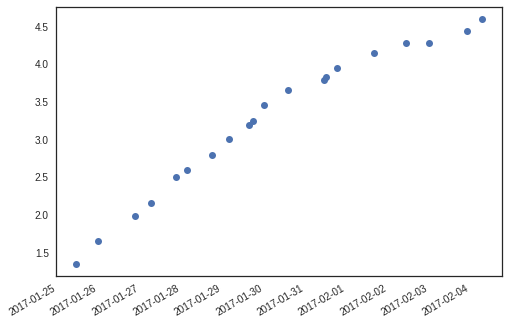

In [15]:
import matplotlib.pyplot as plt
# We will plot the data values and set the linestyle to 'None' which will not plot the line. We also want to show the individual data points, so we set the marker.
plt.plot(sampledata['DateCol2'].values, sampledata['FloatCol'].values, linestyle='None', marker='o')
# autofmt_xdate() tells the computer that it should treat the x-values as dates and format them appropriately. This is a figure function, so we use gcf() to "get current figure"
plt.gcf().autofmt_xdate()

#### Geographical

Although this is not typically a single data type, you may encounter geographical data. These are typically in a Latitude-Longitude format where both Latitude and Longitude are floating point numbers like this: (32.1545, -138.5532). There are a number of tools we can use to work with and plot this type of data, so I wanted to cover it now. For now, we will treat these as separate entities and work with geographical data as we encounter it.

In [16]:
print("Latitude Values")
print(sampledata['LatCol'].values)
print("Longitude Values")
print(sampledata['LonCol'].values)

Latitude Values
[-39.49065628 -70.12948911 -16.13173975  87.89217686  70.44943608
  58.05434711  -2.53972797 -62.7995723  -82.55162128 -70.17320869
 -25.36587139 -75.60602277  -7.53093654 -42.9814863   66.79396011
  25.04139344   1.83167685   8.00208991  33.87311843  37.14139842]
Longitude Values
[ 155.028043    -38.5430472    29.02027996  -88.75756107  -83.95066221
 -115.3764318   -68.05589951  -29.09891648  -45.48397025   79.36955726
 -154.2330359     8.00061215 -173.3395272   -75.00614985 -113.6252933
   -1.75222417  -33.07273958  138.9382069   102.8687652    69.72581269]


It is also useful to plot the geographical data. There are python libraries that make this easy to do.

/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1656: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1800: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3327: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3336: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


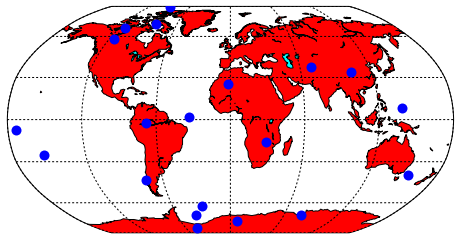

In [17]:
from mpl_toolkits.basemap import Basemap
import numpy as np

# Draw the base map of the world
m = Basemap(projection='robin',lon_0=0,resolution='c')
# Draw the continent coast lines
m.drawcoastlines()
# Color in the water and the land masses
m.fillcontinents(color='red',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
#m.drawmapboundary(fill_color='aqua')

# Prep the data for plotting on the map
x,y = m(sampledata['LonCol'].values, sampledata['LatCol'].values)
# Plot the data points on the map
m.plot(x,y, 'bo', markersize=10)

### Column-wise processing

Now that we have data columns, we've already seen a couple of examples of column-wise processing. When we created the categorical column and the datetime column we took the data from one column and operated on it all at the same time creating the new columns with the different data types. There are other ways to manipulate the columns.

#### apply

The `apply` function takes each entry in a column and *applies* whatever function you want to the entry. For example, we are interested in whether the entry is greater than 4. We will simplify the code by using what is called a **`lambda`** function. So, inside the `apply()` function we have: `lambda x: x>4`. This is shorthand notation for the following:

"Treat `x` as if it were each entry in the column. Apply whatever follows the colon (:) to each entry and create a new column based on the output". The use of `x` was arbitrary: we could choose any variable. For example if we chose `w`, the code would read: `lambda w: w>4`. This would do exactly the same thing.

In [18]:
sampledata['GTfour'] = sampledata['FloatCol'].apply(lambda x: x > 4.0)
print(sampledata[['FloatCol','GTfour']])

    FloatCol GTfour
0   1.348465  False
1   1.658523  False
2   1.990915  False
3   2.158079  False
4   2.500187  False
5   2.602705  False
6   2.795402  False
7   3.013844  False
8   3.191672  False
9   3.252009  False
10  3.460851  False
11  3.658682  False
12  3.790619  False
13  3.833512  False
14  3.946359  False
15  4.154751   True
16  4.279761   True
17  4.276088   True
18  4.446735   True
19  4.596708   True


In [19]:
sampledata['FloatCC'] = sampledata['FloatCol'].apply(lambda cellentry: cellentry if cellentry < 2 else 0)
print(sampledata[['FloatCol','FloatCC']])

    FloatCol   FloatCC
0   1.348465  1.348465
1   1.658523  1.658523
2   1.990915  1.990915
3   2.158079  0.000000
4   2.500187  0.000000
5   2.602705  0.000000
6   2.795402  0.000000
7   3.013844  0.000000
8   3.191672  0.000000
9   3.252009  0.000000
10  3.460851  0.000000
11  3.658682  0.000000
12  3.790619  0.000000
13  3.833512  0.000000
14  3.946359  0.000000
15  4.154751  0.000000
16  4.279761  0.000000
17  4.276088  0.000000
18  4.446735  0.000000
19  4.596708  0.000000


#### Common functions

There are a number of common functions that we could use inside the `apply`. For example, if we wanted to get the square root of each entry, this is what it would look like. We are using the function `np.sqrt` from the `numpy` library. We already imported this library, but if we didn't, we'd need to `import numpy as np` before running this function.

In [20]:
sampledata['FloatSQRT'] = sampledata['FloatCol'].apply(np.sqrt)
print(sampledata[['FloatCol','FloatSQRT']])

    FloatCol  FloatSQRT
0   1.348465   1.161234
1   1.658523   1.287837
2   1.990915   1.410998
3   2.158079   1.469040
4   2.500187   1.581198
5   2.602705   1.613290
6   2.795402   1.671945
7   3.013844   1.736043
8   3.191672   1.786525
9   3.252009   1.803333
10  3.460851   1.860336
11  3.658682   1.912768
12  3.790619   1.946951
13  3.833512   1.957936
14  3.946359   1.986545
15  4.154751   2.038321
16  4.279761   2.068758
17  4.276088   2.067870
18  4.446735   2.108728
19  4.596708   2.143993


Another useful function is adding up columns. Note that we need to tell pandas to run through each row by adding the argument `axis=1` to the `apply` function. Otherwise it tries to add up each column. This might be something you might want to do, too, though the easiest way to do that is to use the pandas `sum` function for the column.

In [21]:
sampledata['IntSUM'] = sampledata[['IntCol','FloatCol']].apply(np.sum,axis=0)
print(sampledata[['IntCol','FloatCol','IntSUM']])

    IntCol  FloatCol  IntSUM
0        1  1.348465     NaN
1        2  1.658523     NaN
2        3  1.990915     NaN
3        4  2.158079     NaN
4        5  2.500187     NaN
5        6  2.602705     NaN
6        7  2.795402     NaN
7        8  3.013844     NaN
8        9  3.191672     NaN
9       10  3.252009     NaN
10      11  3.460851     NaN
11      12  3.658682     NaN
12      13  3.790619     NaN
13      14  3.833512     NaN
14      15  3.946359     NaN
15      16  4.154751     NaN
16      17  4.279761     NaN
17      18  4.276088     NaN
18      19  4.446735     NaN
19      20  4.596708     NaN


In [22]:
sampledata[['IntCol','FloatCol']].apply(np.sum,axis=0)

IntCol      210.000000
FloatCol     64.955867
dtype: float64

In [23]:
sampledata['IntCol'].sum()

210

#### Custom functions

We will now create our first custom function and use it to process the data. We will make a short function that will look to see if a value in the TextCol feature matches an item on a list we create.

In [24]:

# We first tell the computer that we are writing a function by starting with "def"
# The next text is the name of the function. We name this one "isMammal" meaning it will tell us if an animal is in our list of mammals
# The final text in the parenthesis is an input to the function. This is another "dummy" variable - we could give it any name we want. 
# In this case we call it "animal" to remind ourselves that we expect an animal type in text form.
def isMammal(animal):
    # We create a list of text objects that will be our "inclusive" list. If the item is on this list, the function will return True. Otherwise it returns false.
    mammallist = ['cat','dog','horse','cow','elephant','giraffe','wolf','prairie dog', 'whale', 'dolphin']
    # This is our first "if" statement. What this particular version does is look at the list "mammallist". 
    # If the text passed into the variable "animal" matches any item in the list, it jumps into this next block of code
    # Otherwise it jumps into block of code following the "else" statement
    if animal in mammallist:
        # the "return" code word tells the computer we are done and to send back to the apply function the value following "return". In this case, send back "True"
        return 'mammal'
    else:
        # The other case will send back "false".
        return 'notmammal'
    
sampledata['IsMammal'] = sampledata['TextCol'].apply(isMammal)
print(sampledata[['TextCol', 'IsMammal']])

        TextCol   IsMammal
0           cat     mammal
1           dog     mammal
2         horse     mammal
3           cow     mammal
4      elephant     mammal
5          fish  notmammal
6          bird  notmammal
7      dinosaur  notmammal
8       giraffe     mammal
9          wolf     mammal
10  prairie dog     mammal
11        whale     mammal
12      dolphin     mammal
13         clam  notmammal
14       lizard  notmammal
15        snake  notmammal
16          fly  notmammal
17       beetle  notmammal
18       spider  notmammal
19         worm  notmammal


In [25]:
# We'll now operate on an entire row of data at once and do a more complicated operation. We'll return only mammals where the 'FloatCol' is smaller than 2.

def isMammalFloat(row):
    # We create a list of text objects that will be our "inclusive" list. If the item is on this list, the function will return True. Otherwise it returns false.
    mammallist = ['cat','dog','horse','cow','elephant','giraffe','wolf','prairie dog', 'whale', 'dolphin']
    
    # We need to identify the animal from the row - it can be addressed using the column name
    animal = row['TextCol']
    
    if animal in mammallist:
        # the "return" code word tells the computer we are done and to send back to the apply function the value following "return". 
        # In this case it returns True if the float value is less than 2 and false otherwise.
        return row['FloatCol'] < 2
    else:
        # If it isn't a mammal, return false
        return False

# Note that we need to tell `apply` to send one row at a time by adding the `axis=1` argument
sampledata['IsSmallMammal'] = sampledata.apply(isMammalFloat, axis=1)
print(sampledata[['TextCol', 'FloatCol','IsSmallMammal']])

        TextCol  FloatCol IsSmallMammal
0           cat  1.348465          True
1           dog  1.658523          True
2         horse  1.990915          True
3           cow  2.158079         False
4      elephant  2.500187         False
5          fish  2.602705         False
6          bird  2.795402         False
7      dinosaur  3.013844         False
8       giraffe  3.191672         False
9          wolf  3.252009         False
10  prairie dog  3.460851         False
11        whale  3.658682         False
12      dolphin  3.790619         False
13         clam  3.833512         False
14       lizard  3.946359         False
15        snake  4.154751         False
16          fly  4.279761         False
17       beetle  4.276088         False
18       spider  4.446735         False
19         worm  4.596708         False


In [26]:
sampledata['TextCol'][ sampledata['FloatCol']<2 ]

0      cat
1      dog
2    horse
Name: TextCol, dtype: object

### Feature extraction

We can often pull additional features from what we currently have. This involves doing a column-wise processing step, but with the additional component of doing a transformation or extraction from the data. We'll look at a couple of techniques to do this.

#### Date/day/week features

We already saw how to take a text column that is a date and turn it into a datetime data type. The `to_datetime()` function has the capability of parsing many different string formats. I recommend looking at the [documentation for the function](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to learn how to do parsing of more specific date time formats. 

Once we have a datetime data type, we can use other functions to get, for example, the day of the week or the week of the year for any given date. This may be useful for looking at weekly patterns or yearly patterns. The full list of features we can easily extract is [found in the documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components). We use the `apply` function with the simple in-line `lambda` function to get the date or time features. Another use for this might be to identify holidays- for example, Memorial day is always on the same relative day of the year (last Monday in May). We could use these functions to identify which days are national or bank holidays.

In [27]:
# Get the day of the week for each of the data features. We can get either a numerical value (0-6) or the names
sampledata['DayofWeek'] = sampledata['DateCol2'].apply(lambda x: x.weekday_name)
# Or the week number in the year
sampledata['WeekofYear'] = sampledata['DateCol2'].apply(lambda x: x.week)

print(sampledata[['DayofWeek', 'WeekofYear']])

    DayofWeek  WeekofYear
0   Wednesday           4
1    Thursday           4
2    Thursday           4
3      Friday           4
4      Friday           4
5    Saturday           4
6    Saturday           4
7      Sunday           4
8      Sunday           4
9      Sunday           4
10     Monday           5
11     Monday           5
12    Tuesday           5
13    Tuesday           5
14    Tuesday           5
15  Wednesday           5
16   Thursday           5
17   Thursday           5
18     Friday           5
19   Saturday           5


#### Unique values

Sometimes it is helpful to know what unique values are in a column. Especially when there are many rows (millions), it is impractical to manually scan through the columns to look for unique values. However, we can use a pandas function `unique()` to do just that. We will see this is particularly helpful in doing data cleaning to identify rows with problems in the data.

In [28]:
sampledata['CatCol'].unique()

array(['no', 'yes', 'maybe'], dtype=object)

#### Text regex features

Another type of text feature extraction using a `regex` or *regular expression* pattern recognition code. The date/time conversion uses one form of this, but we can be more general in identifying patterns. There are some very useful tools for testing your pattern. I like the tester at https://regex101.com/. I use it whenever I build a pattern recognition string. 

In [29]:
# This simple text pattern gathers all the letters up to (but not including) the last 'e' in the text entry. There are lots of other pattern recognition tools to extract features from text.
# Note that it returns "NaN" if there are no 'e's in the text string. We could use that to find all the strings without an 'e' in them.
sampledata['TextCol'].str.extract("(.*)e", expand=True)

,0
0,NaN
1,NaN
2,hors
3,NaN
4,el
5,NaN
6,NaN
7,NaN
8,giraff
9,NaN


#### Converting to categorical

We already saw how to convert text columns to categorical columns. We can also covert other data types to categorical columns. For example, we could bin a float column into regularly sized bins, then create a categorical column from those bins.

### Word/Text cleaning

Finally, it is often useful to clean up text entries before trying to turn them into features. For example, we may want to remove all punctuation, capital letters, or other special characters. We may also want to consider all of the forms of a word as the same word. For example, we may want to have both "dog" and "dogs" as the same feature. Or we may want "wonder" and "wonderful" as the same feature. There are a couple of text processing tools in python that simplify this work considerably.

I created a small dataset to work with. We'll use one of the rows to test our text cleaning process.

In [30]:
textDF = pd.read_csv('Class03_text.tsv',sep='\t')
testcase = textDF['review'][3]
testcase

"I went to see this film with a great deal of excitement as I was at school with the director, he was even a good friend of mine for a while. But sorry mate, this film stinks.<br /><br />I can only talk about what was wrong with the first half because that's when I walked out and went to the pub for a much needed drink:<br /><br />1) someone's standing on a balcony about to jump and so you send a helicopter to shine a searchlight on them??? I don't think so - nothing would make them more likely to jump.<br /><br />2) local radio doesn't send reporters to cover people about to attempt suicide - again for fear of pressuring them into jumping - or for fear of encouraging copy-cat instances.<br /><br />3) whatever the circumstances, radio reporters don't do live broadcasts from the 10th floor of a tower block. Radio cars don't carry leads long enough to connect the microphone and headphones to the transmitter.<br /><br />4) the stuck in the lift scene was utterly derivative<br /><br />5) t

The first thing we notice is that there are hypertext bits in the text (the `<br />` items). We want to clean all of those out. The BeautifulSoup function does this for us.

In [31]:
from bs4 import BeautifulSoup
cleantext = BeautifulSoup(testcase,"html5lib").text
cleantext

"I went to see this film with a great deal of excitement as I was at school with the director, he was even a good friend of mine for a while. But sorry mate, this film stinks.I can only talk about what was wrong with the first half because that's when I walked out and went to the pub for a much needed drink:1) someone's standing on a balcony about to jump and so you send a helicopter to shine a searchlight on them??? I don't think so - nothing would make them more likely to jump.2) local radio doesn't send reporters to cover people about to attempt suicide - again for fear of pressuring them into jumping - or for fear of encouraging copy-cat instances.3) whatever the circumstances, radio reporters don't do live broadcasts from the 10th floor of a tower block. Radio cars don't carry leads long enough to connect the microphone and headphones to the transmitter.4) the stuck in the lift scene was utterly derivative5) the acting and direction was almost non existent.I could go on, but I won

We now want to get rid of everything that isn't an alphabetical letter. That will clean up all punctuation and get rid of all numbers. We'll use a regex substitution function to do this. It looks for everything that is not an alphabetical character and replaces it with a blank space.

In [32]:
import re
onlyletters = re.sub("[^a-zA-Z]"," ",cleantext)
onlyletters

'I went to see this film with a great deal of excitement as I was at school with the director  he was even a good friend of mine for a while  But sorry mate  this film stinks I can only talk about what was wrong with the first half because that s when I walked out and went to the pub for a much needed drink    someone s standing on a balcony about to jump and so you send a helicopter to shine a searchlight on them    I don t think so   nothing would make them more likely to jump    local radio doesn t send reporters to cover people about to attempt suicide   again for fear of pressuring them into jumping   or for fear of encouraging copy cat instances    whatever the circumstances  radio reporters don t do live broadcasts from the   th floor of a tower block  Radio cars don t carry leads long enough to connect the microphone and headphones to the transmitter    the stuck in the lift scene was utterly derivative   the acting and direction was almost non existent I could go on  but I won

We'll get rid of upper-case letters to only look at the words themselves.

In [33]:
lowercase = onlyletters.lower()
lowercase

'i went to see this film with a great deal of excitement as i was at school with the director  he was even a good friend of mine for a while  but sorry mate  this film stinks i can only talk about what was wrong with the first half because that s when i walked out and went to the pub for a much needed drink    someone s standing on a balcony about to jump and so you send a helicopter to shine a searchlight on them    i don t think so   nothing would make them more likely to jump    local radio doesn t send reporters to cover people about to attempt suicide   again for fear of pressuring them into jumping   or for fear of encouraging copy cat instances    whatever the circumstances  radio reporters don t do live broadcasts from the   th floor of a tower block  radio cars don t carry leads long enough to connect the microphone and headphones to the transmitter    the stuck in the lift scene was utterly derivative   the acting and direction was almost non existent i could go on  but i won

The next two steps we'll do at once because we need to split up the text into individual words to do them. The `split()` function breaks up the string into an array of words. We will then eliminate any words that are **stopwords** in English. These are words like "and", "or", "the" that don't communciate any information but are necessary for language.

The other thing we'll do is cut the words down to their root stems. This will get rid of plurals or other modifications of words.

In [34]:
import nltk
from nltk.corpus import stopwords # Import the stop word list

words = lowercase.split() 
meaningfulwords = [w for w in words if not w in stopwords.words("english")]

from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")

stemmedwords = [snowball_stemmer.stem(w) for w in meaningfulwords ]

print(" ".join(meaningfulwords))
print("\n")
print(" ".join(stemmedwords))

went see film great deal excitement school director even good friend mine sorry mate film stinks talk wrong first half walked went pub much needed drink someone standing balcony jump send helicopter shine searchlight think nothing would make likely jump local radio send reporters cover people attempt suicide fear pressuring jumping fear encouraging copy cat instances whatever circumstances radio reporters live broadcasts th floor tower block radio cars carry leads long enough connect microphone headphones transmitter stuck lift scene utterly derivative acting direction almost non existent could go


went see film great deal excit school director even good friend mine sorri mate film stink talk wrong first half walk went pub much need drink someon stand balconi jump send helicopt shine searchlight think noth would make like jump local radio send report cover peopl attempt suicid fear pressur jump fear encourag copi cat instanc whatev circumst radio report live broadcast th floor tower b

In [35]:
# Now we make a function that we can apply to every entry in the dataframe

def cleantext(textinput):
    
    # First Pass: remove any html tags
    from bs4 import BeautifulSoup
    cleantext = BeautifulSoup(textinput,"html5lib").text
    
    # Second pass: remove non-letters and make everything lower case
    import re
    testcase = re.sub("[^a-zA-Z]"," ",cleantext)
    lowercase = testcase.lower()
    
    # Third pass: remove all stop words (non-essential words)
    from nltk.corpus import stopwords # Import the stop word list
    words = lowercase.split() 
    meaningfulwords = [w for w in words if not w in stopwords.words("english")]

    # Fourth pass: get the word stems so that plurals, etc. are reduced
    from nltk.stem import SnowballStemmer
    snowball_stemmer = SnowballStemmer("english")
    stemmedwords = [snowball_stemmer.stem(w) for w in meaningfulwords ]

    # Put the words back together again with a single space beteen them
    return " ".join(stemmedwords)

textDF['cleaned'] = textDF['review'].apply(cleantext)
textDF

,id,review,cleaned
0,9999_0,"Watching Time Chasers, it obvious that it was ...",watch time chaser obvious made bunch friend ma...
1,45057_0,I saw this film about 20 years ago and remembe...,saw film year ago rememb particular nasti beli...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba...",minor spoilersin new york joan barnard elvir a...
3,7161_0,I went to see this film with a great deal of e...,went see film great deal excit school director...
4,43971_0,"Yes, I agree with everyone on this site this m...",yes agre everyon site movi bad even call movi ...
5,36495_0,Jennifer Ehle was sparkling in \Pride and Prej...,jennif ehl sparkl pride prejudic jeremi northa...
6,49472_0,Amy Poehler is a terrific comedian on Saturday...,ami poehler terrif comedian saturday night liv...
7,36693_0,A plane carrying employees of a large biotech ...,plane carri employe larg biotech firm includ c...
8,316_0,"A well made, gritty science fiction movie, it ...",well made gritti scienc fiction movi could los...
9,32454_0,Incredibly dumb and utterly predictable story ...,incred dumb utter predict stori rich teen girl...


## Data Cleaning Example In-class Activity

The tutorial on cleaning messy data is located here: http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%207%20-%20Cleaning%20up%20messy%20data.ipynb

Follow the tutorial, looking at the data and how to do a preliminary clean to eliminate entries that aren't correct or don't help. The data file can be loaded from the SageMath folder. I've reduced the number of column features in the data set to make it a bit easier to work with.

In [36]:
requests = pd.read_csv("Class03_311_data.csv")

# Assignment

Your assignment is to do data processing and cleaning on your own dataset. I want documentation of what you've done and why you chose to do those things to your data. 

I would also like you to try redoing your regression from last week, using the new features that you create through the data processing steps. See if you can improve the quality of your regression.
